# Sistemas Nebulosos

## Atividade Prática 2 - Inferência Fuzzy

***
### Felipe Bartelt de Assis Pessoa - 2016026841
### Wanderson da Silva Maciel Filho - 2017002660

In [1]:
from plotly.subplots import make_subplots
import numpy as np
import plotly.graph_objects as go
import sys
print('Python version: '+sys.version)
print('Numpy version: '+np.__version__, '\nPlotly version: '+__import__('plotly').__version__)

Python version: 3.10.1 (main, Dec 11 2021, 17:22:55) [GCC 11.1.0]
Numpy version: 1.21.4 
Plotly version: 5.4.0


## Parte 1 - Relações, Composição e Raciocínio Nebuloso

### Questão 1
$$
Q(U,V)=\begin{bmatrix}0 &0.8 &0.6 & 0.25\\0.7&0.98&0.15&0.5\end{bmatrix}\\
L(U,V)=\begin{bmatrix}1 &0.2 &0.6 & 0.8\\0.85&0.3&0.8&0.88\end{bmatrix}\\
R(V,W)=\begin{bmatrix}1 &0.4 &0.2\\0.1&0.4&0.7\\0.4&0.15&0.05\\0.85&0.3&0.1\end{bmatrix}\\
$$

$$
\lnot L(U,V) = 1 -\begin{bmatrix}1 &0.2 &0.6 & 0.8\\0.85&0.3&0.8&0.88\end{bmatrix} = \begin{bmatrix}0 &0.8 &0.4 & 0.2\\0.15&0.7&0.2&0.12\end{bmatrix}\\
M(U,V) = Q(U,V)\ \wedge\ \lnot L(U,V)\\=
\begin{bmatrix}\min(0,0) &\min(0.8,0.8) &\min(0.6,0.4) & \min(0.25,0.2)\\\min(0.7,0.15)&\min(0.98, 0.7)&\min(0.15,0.2)&\min(0.5,0.12)\end{bmatrix}\\
\therefore M(U,V)=\begin{bmatrix}0 &0.8 &0.4 & 0.2\\0.15&0.7&0.15&0.12\end{bmatrix}
$$

$$
P = Q\circ R =\\
\scriptsize
\begin{bmatrix}\max(0\cdot1,0.8\cdot0.1,0.6\cdot0.4,0.25\cdot0.85) &
\max(0\cdot0.4,0.8\cdot0.4,0.6\cdot0.15,0.25\cdot0.3)&
\max(0\cdot0.2,0.8\cdot0.7,0.6\cdot0.05,0.25\cdot0.1)
\\\max(0.7\cdot1,0.98\cdot0.1,0.15\cdot0.4,0.5\cdot0.85)
&\max(0.7\cdot0.4,0.98\cdot0.4,0.15\cdot0.15,0.5\cdot0.3)
&\max(0.7\cdot0.2,0.98\cdot0.7,0.15\cdot0.05,0.5\cdot0.1)
\end{bmatrix}\normalsize\\
\therefore P(U,W) = \begin{bmatrix}0.24 &0.32 &0.56\\0.7&0.392&0.686\end{bmatrix}\\
$$


### Questão 2
$$
\mu_B =\mu_A\circ R= \begin{bmatrix}1&0.5&0.4&0.2\end{bmatrix}\circ
\begin{bmatrix}1&0.8&0&0\\0.8&1&0.8&0\\0&0.8&1&0.8\\0&0&0.8&1\end{bmatrix}=
\begin{bmatrix}1 & 0.8 &0.5 & 0.4 \end{bmatrix}
$$

### Questão 3

$$
\mu_{young}(x) = gaussian(x,0,20)=e^{-\frac{1}{2}\left(\frac{x}{20}\right)^2}\\
\mu_{old}(x) = gaussian(x,100,30)=e^{-\frac{1}{2}\left(\frac{x-100}{30}\right)^2}
$$

Fontconfig warning: "/usr/share/fontconfig/conf.avail/05-reset-dirs-sample.conf", line 6: unknown element "reset-dirs"
[36717:1219/214519.825130:ERROR:buffer_manager.cc(488)] [.DisplayCompositor]GL ERROR :GL_INVALID_OPERATION : glBufferData: <- error from previous GL command


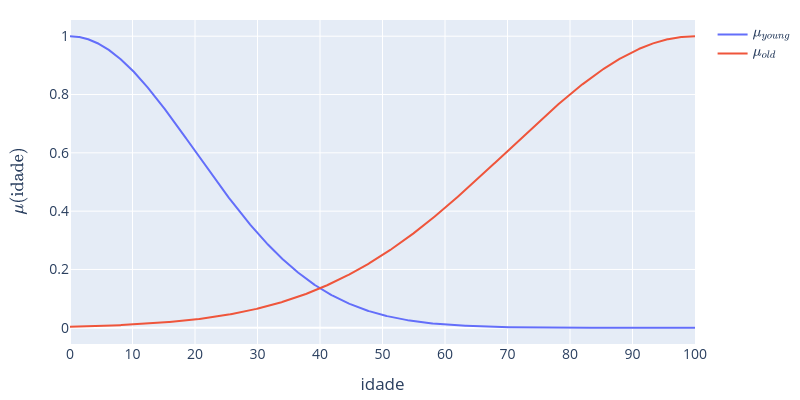

In [2]:
def gaussmf(x, c, sigma):
    return np.exp(-0.5 * ((x - c) / sigma) ** 2)

ages = np.linspace(0, 100, 1000)
young = gaussmf(ages, 0, 20)
old = gaussmf(ages, 100, 30)

fig = go.Figure(go.Scatter(x=ages, y=young, name=r'$\mu_{young}$'))
fig.add_scatter(x=ages, y=old, name=r'$\mu_{old}$')
fig.update_layout(margin=dict(b=10,t=20,r=100,l=70), font_size=14, 
                  xaxis_title='idade', yaxis_title=r'$\mu(\text{idade})$',
                  xaxis_dtick=10)
fig.show(renderer='png', width=800, height=400);

### Questão 4

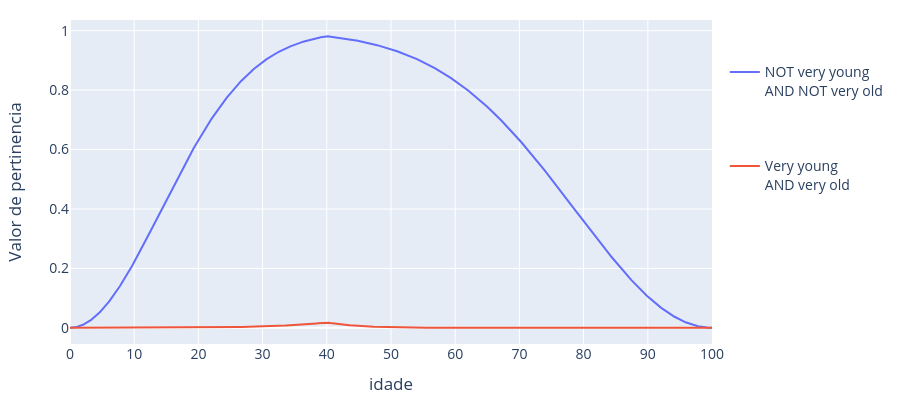

In [17]:
very_old = old**2
very_young = young**2
not_vyoung_n_not_vold = np.minimum(1-very_old, 1-very_young)
vyoung_n_vold = np.minimum(very_old, very_young)

fig = go.Figure(go.Scatter(x=ages, y=not_vyoung_n_not_vold, name='<br></br>NOT very young <br>AND NOT very old</br>'))
fig.add_scatter(x=ages, y=vyoung_n_vold, name='<br></br>Very young <br>AND very old</br>')
fig.update_layout(margin=dict(b=10,t=20,r=100,l=70), font_size=14, 
                  xaxis_title='idade', yaxis_title='Valor de pertinencia',
                  xaxis_dtick=10)
fig.show(renderer='png', width=900, height=400);

### Questão 5
$$
B' = A'\circ R = A'\circ (A\to B)\\
\implies \mu_{B'} = \min\left(\max\left(\min(\mu_{A'}(x), \mu_A(x))\right),\mu_B(y)\right) = \min(w,\mu_B(y))\\
A_1 = 0.2/ x_1 + 0.4/x_2 + 0.5/x_3\\
A_2 = 1/ x_1 + 1/x_2 + 0.3/x_3\\
B_1 = 0.1/ y_1 + 0.3/y_2\\
B_2 = 0.6/ y_1 + 0.2/y_2\\
A' = 0/ x_1 + 1/x_2 +0/x_3\\
$$

$$
\mu_{R_1} = \begin{bmatrix} 0.1 & 0.2 \\ 0.1 & 0.3 \\ 0.1 & 0.3\end{bmatrix}\\
\mu_{R_2} = \begin{bmatrix} 0.6 & 0.2 \\ 0.6 & 0.2 \\ 0.3 & 0.2\end{bmatrix}\\
\mu_{A'} = \begin{bmatrix} 0&1&0\end{bmatrix}
\\
\mu_{B'} = \max\left((\mu_{A'}\circ \mu_{R_1}), (\mu_{A'}\circ \mu_{R_2})\right)\\
\mu_{A'}\circ \mu_{R_1} = \begin{bmatrix} \max(0,0.1,0)&\max(0,0.3,0)\end{bmatrix}=\begin{bmatrix}0.1 & 0.3\end{bmatrix}\\
\mu_{A'}\circ \mu_{R_2} = \begin{bmatrix} \max(0,0.6,0)&\max(0,0.2,0)\end{bmatrix}=\begin{bmatrix}0.6 & 0.2\end{bmatrix}\\
\therefore \mu_{B'} = \max(\begin{bmatrix}0.1 & 0.3\end{bmatrix}, \begin{bmatrix}0.6 & 0.2\end{bmatrix}) = \begin{bmatrix}0.6&0.3\end{bmatrix}\\
\implies B' = 0.6/y_1 + 0.3/y_2
$$


### Questão 6
$$
w_{A_1} = \max\left(\min(\mu_{A'},\mu_{A_1})\right) = \max(0,0.4,0)=0.4=w_1\\
w_{A_2} = \max\left(\min(\mu_{A'},\mu_{A_2})\right) = \max(0,1,0)=1=w_2\\
\implies \mu_{B_1'} = \min(w_1, \mu_{B_1} )
$$

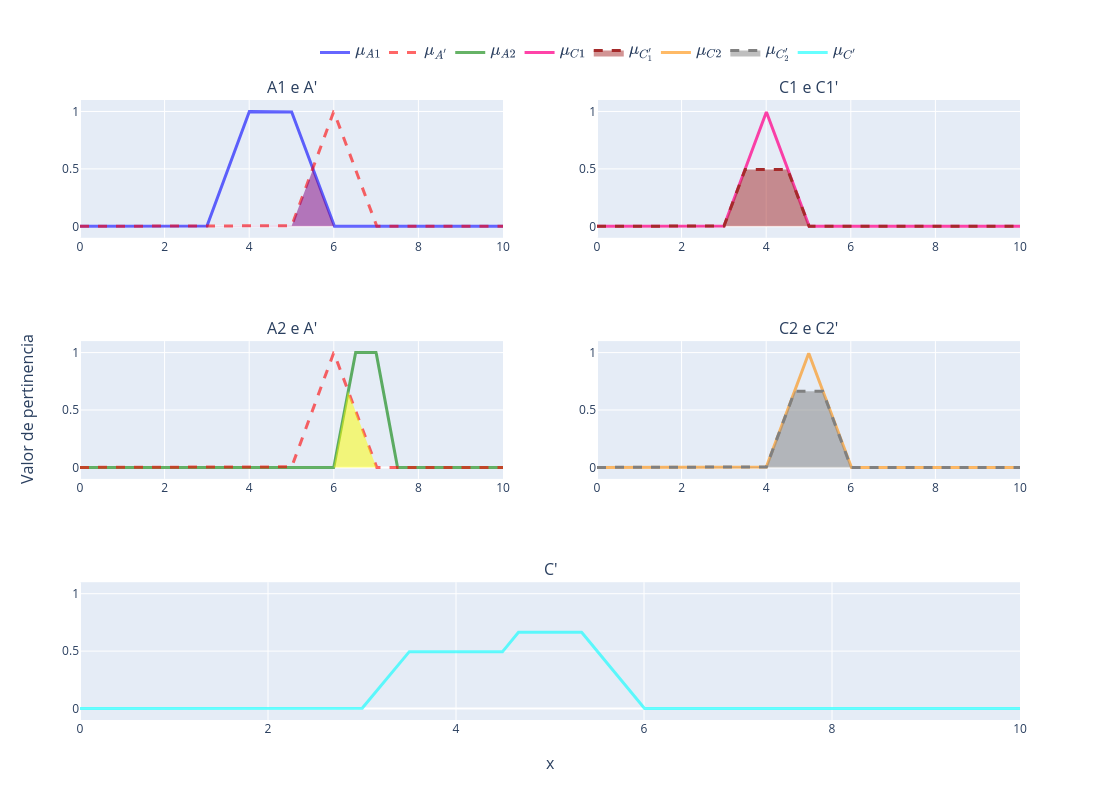

In [3]:
def trimf(x, a, b, c):
    return np.maximum(np.minimum((x - a) / (b - a), (c - x) / (c - b)), 0)

def trapmf(x, a, b, c, d):
    min1 = np.minimum((x - a) / (b - a), (d - x) / (d - c))
    return np.maximum(np.minimum(min1, 1), 0)

x = np.linspace(0, 10, 1000)
y = np.linspace(0, 10, 1000)
mu_A1 = trapmf(x, 3, 4, 5, 6)
mu_A2 = trapmf(x, 6, 6.5, 7, 7.5)
mu_C1 = trimf(y, 3, 4, 5)
mu_C2 = trimf(y, 4, 5, 6)
mu_A_ = trimf(x, 5, 6, 7)
w1 = np.minimum(mu_A1, mu_A_)
w2 = np.minimum(mu_A2, mu_A_)

mu_C1_ = np.minimum(np.max(w1), mu_C1)
mu_C2_ = np.minimum(np.max(w2), mu_C2)
mu_C_ = np.maximum(mu_C1_, mu_C2_)

fig = make_subplots(rows=3, cols=2, 
                    specs=[[{}, {}], [{}, {}],[{"rowspan": 1, "colspan": 2}, None]],
                    subplot_titles=("A1 e A'", "C1 e C1'", "A2 e A'", "C2 e C2'", "C'"),
                    x_title='x', y_title='Valor de pertinencia')
fig.add_scatter(x=x, y=mu_A1, name=r'$\mu_{A1}$', opacity=0.6, mode='lines', line_width=3, row=1, col=1, marker_color='blue')
fig.add_scatter(x=x, y=mu_A_, name=r"$\mu_{A'}$", opacity=0.6, mode='lines', line_width=3, row=1, col=1, marker_color='red', line_dash='dash')
fig.add_scatter(x=x, y=w1, name=r"$w_1$", opacity=0.6, mode='lines', row=1, col=1, fill='tozeroy', line_width=0, line_color='purple',showlegend=False)
fig.add_scatter(x=x, y=mu_A2, name=r'$\mu_{A2}$', opacity=0.6, mode='lines', line_width=3, row=2, col=1, marker_color='green')
fig.add_scatter(x=x, y=mu_A_, name=r"$\mu_{A'}$", opacity=0.6, mode='lines', line_width=3, row=2, col=1, marker_color='red', showlegend=False, line_dash='dash')
fig.add_scatter(x=x, y=w2, name=r"$w_2$", opacity=0.6, mode='lines', row=2, col=1, fill='tozeroy', line_width=0, line_color='yellow',showlegend=False)

fig.add_scatter(x=x, y=mu_C1, name=r'$\mu_{C1}$', opacity=0.8, mode='lines', line_width=3, row=1, col=2, marker_color='deeppink')
fig.add_scatter(x=x, y=mu_C1_, name=r"$\mu_{C_1'}$", opacity=0.4, mode='lines', line_width=3, row=1, col=2, marker_color='brown', fill='tozeroy',line_dash='dash')
fig.add_scatter(x=x, y=mu_C2, name=r'$\mu_{C2}$', opacity=0.6, mode='lines', line_width=3, row=2, col=2, marker_color='darkorange')
fig.add_scatter(x=x, y=mu_C2_, name=r"$\mu_{C_2'}$", opacity=0.6, mode='lines', line_width=3, row=2, col=2, marker_color='gray', fill='tozeroy', line_dash='dash')

fig.add_scatter(x=x, y=mu_C_, name=r"$\mu_{C'}$", opacity=0.6, mode='lines', line_width=3, row=3, col=1, marker_color='cyan')

fig.update_layout(legend=dict(font_size=16, orientation="h", y=1.1, x=0.25))
fig.update_yaxes(range=[-0.1,1.1])
fig.show(renderer='png', width=1100, height=800);


***

## Parte 2 - Inferência Fuzzy

### Questão 2

$$
y = \cos(x),\ -\frac{\pi}{2}\le x \le \frac{3}{2}
$$

Regras:
- Se $x$ é $A_1$, então $f_1(x)=p_1x+q_1$

- Se $x$ é $A_2$, então $f_2(x)=p_2x+q_2$

- Se $x$ é $A_3$, então $f_3(x)=p_2x+q_3$

Então $\mu_{A_1} = \text{trimf}\left(x, \left[-\frac{\pi}{2},\ 0,\ \frac{\pi}{2}\right]\right)$, $\mu_{A_2} = \text{trimf}\left(x, \left[0,\ \frac{\pi}{2},\ \pi\right]\right)$, $\mu_{A_3} = \text{trimf}\left(x, \left[\frac{\pi}{2},\ \pi,\ \frac{3\pi}{2}\right]\right)$, tendo-se um pico para cada ponto zero da função original e a composição de duas funções de pertinência para cada ponto crítico.

Tomando-se três semiretas para aproximar cada intervalo de crescimento da função original, pode-se obter diretamente
$$
\begin{align*}
y_1 &= \frac{2}{\pi} \cdot x + 1\\
y_2 &= -\frac{2}{\pi} \cdot x + 1\\
y_3 &= \frac{2}{\pi} \cdot x - 3
\end{align*}
$$

Dessa forma, $f(x) = \frac{\mu_{A_1}\cdot y_1 + \mu_{A_2}\cdot y_2+ \mu_{A_3}\cdot y_3}{\mu_{A_1}+\mu_{A_2}+\mu_{A_3}}$.

Esse procedimento é ilustrado graficamente abaixo:

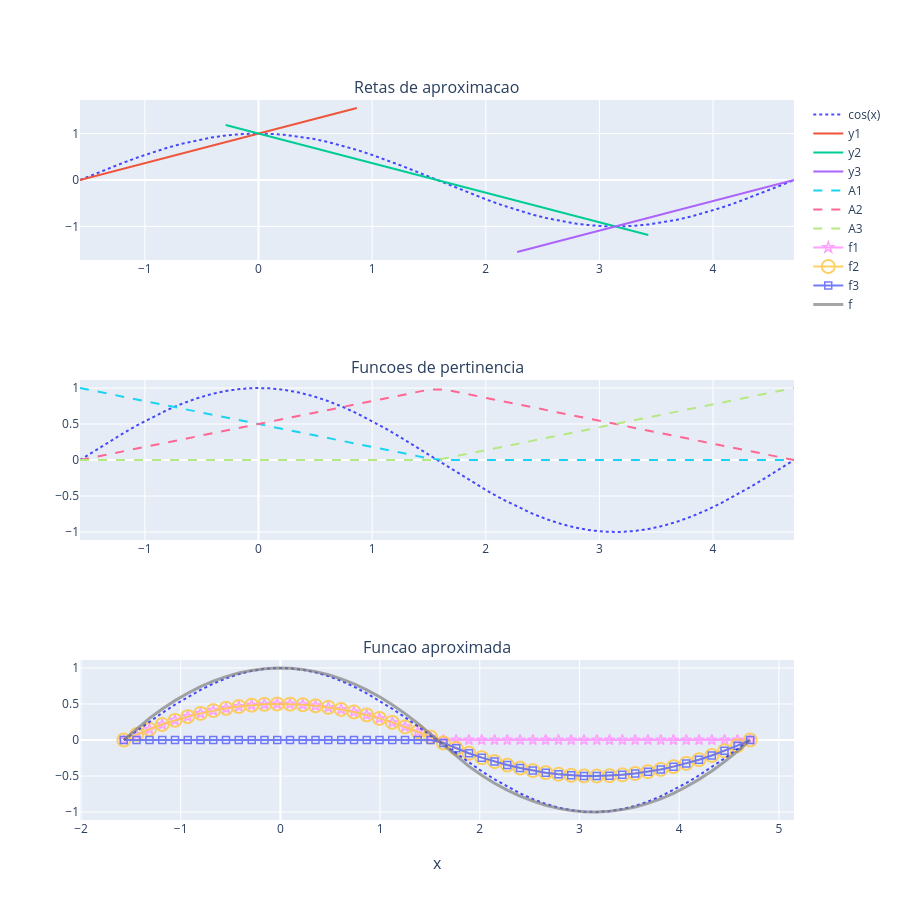

In [226]:
x = np.linspace(-np.pi/2, 3*np.pi/2)
y = np.cos(x)
A1 = trimf(x, -3*np.pi/2, -np.pi/2, np.pi/2)
A2 = trimf(x, -np.pi/2, np.pi/2, 3*np.pi/2)
A3 = trimf(x, np.pi/2, 3*np.pi/2, 5*np.pi/2)

y1 = (2 / np.pi * x + 1) 
y2 = (-2 / np.pi * x + 1)
y3 = (2 / np.pi * x - 3)
f1 = y1 * A1
f2 = y2 * A2
f3 = y3 * A3
f = (f1 + f2 + f3) / (A1 + A2 + A3)

fig = make_subplots(rows=3, cols=1, 
                    subplot_titles=("Retas de aproximacao", "Funcoes de pertinencia", 'Funcao aproximada'),
                    x_title='x')

fig.add_scatter(x=x,y=y, name='cos(x)', row=1, col=1, line_color='blue',opacity=0.7, line_dash='dot')
fig.add_scatter(x=x, y=y1[:20], name='y1', row=1, col=1)
fig.add_scatter(x=x[10:40], y=y2[10:40], name='y2', row=1, col=1)
fig.add_scatter(x=x[30:], y=y3[30:], name='y3', row=1, col=1)

fig.add_scatter(x=x,y=y, name='cos(x)', row=2, col=1, line_color='blue',opacity=0.7, line_dash='dot', showlegend=False)
fig.add_scatter(x=x, y=A1, name='A1', line_dash= 'dash', row=2, col=1)
fig.add_scatter(x=x, y=A2, name='A2', line_dash= 'dash', row=2, col=1)
fig.add_scatter(x=x, y=A3, name='A3', line_dash= 'dash', row=2, col=1)

fig.add_scatter(x=x, y=f1, name='f1', row=3, col=1, line_width=2, mode='lines+markers', marker_symbol='star-open', marker_size=8, opacity=0.9, marker_line=dict(width=1.5))
fig.add_scatter(x=x, y=f2, name='f2', row=3, col=1, line_width=2, mode='lines+markers', marker_symbol='circle-open', marker_size=13, opacity=0.9, marker_line=dict(width=2))
fig.add_scatter(x=x, y=f3, name='f3', row=3, col=1, line_width=2, mode='lines+markers', marker_symbol='square-open', marker_size=7, opacity=0.9, marker_line=dict(width=1.5))

fig.add_scatter(x=x,y=y, name='cos(x)', row=3, col=1, showlegend=False, line_color='blue', opacity=0.7, line_dash='dot')
fig.add_scatter(x=x, y=f, name='f', row=3, col=1, opacity=0.7, line_width=3, line_color='gray')
fig.show(renderer='png', width=900, height=900)

### Questão 3

Para os Experimentos 1 e 2, foram utilizadas as seguintes retas de aproximação:

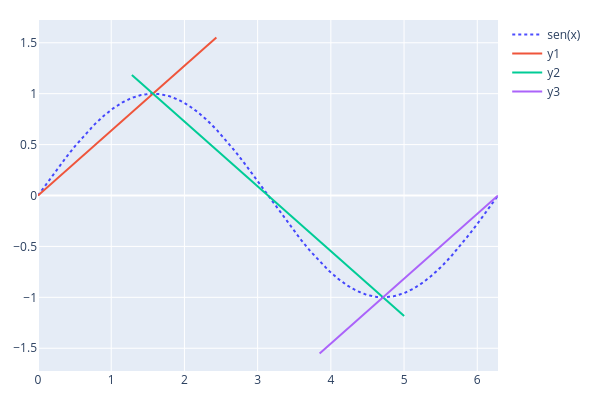

In [282]:
x = np.linspace(0, 2*np.pi)
y = np.sin(x)

y1 = (2 / np.pi * x) 
y2 = (-2 / np.pi * x + 2)
y3 = (2 / np.pi * x - 4)

fig = go.Figure(go.Scatter(x=x,y=y, name='sen(x)', line_color='blue',opacity=0.7, line_dash='dot'))
fig.add_scatter(x=x, y=y1[:20], name='y1')
fig.add_scatter(x=x[10:40], y=y2[10:40], name='y2')
fig.add_scatter(x=x[30:], y=y3[30:], name='y3')
fig.update_layout(margin=dict(b=20,l=20,t=20))

fig.show(renderer='png', width=600, height=400)

#### Experimento 1

3 funções de pertinência triangulares

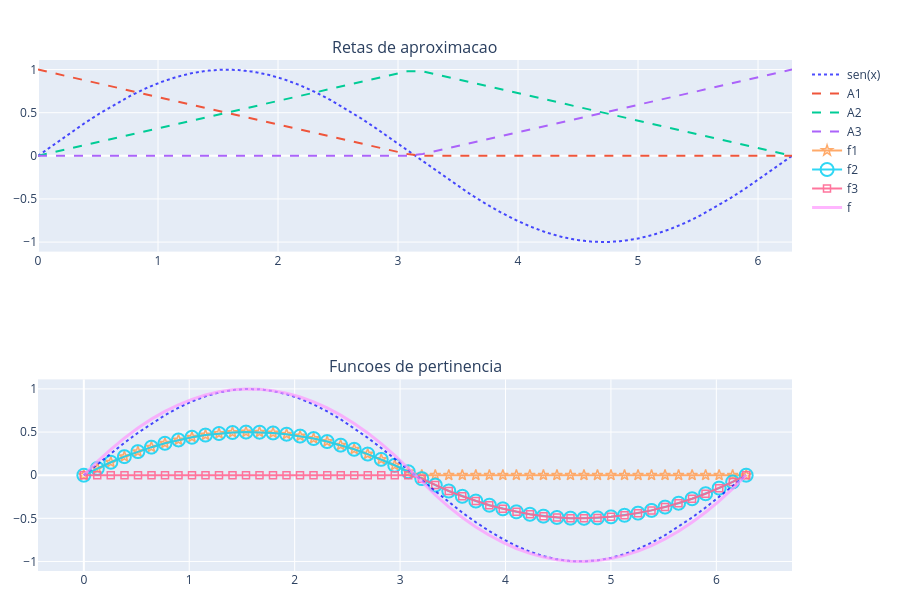

MSE: 0.001258527407854524


In [270]:
x = np.linspace(0, 2*np.pi)
y = np.sin(x)
A1 = trimf(x, -np.pi, 0, np.pi)
A2 = trimf(x, 0, np.pi, 2*np.pi)
A3 = trimf(x, np.pi, 2*np.pi, 3*np.pi)

f1 = y1 * A1
f2 = y2 * A2
f3 = y3 * A3
f = (f1 + f2 + f3) / (A1 + A2 + A3)

fig = make_subplots(rows=2, cols=1, 
                    subplot_titles=("Retas de aproximacao", "Funcoes de pertinencia", 'Funcao aproximada'),
                    x_title='x')

fig.add_scatter(x=x,y=y, name='sen(x)', row=1, col=1, line_color='blue',opacity=0.7, line_dash='dot')
fig.add_scatter(x=x, y=A1, name='A1', line_dash= 'dash', row=1, col=1)
fig.add_scatter(x=x, y=A2, name='A2', line_dash= 'dash', row=1, col=1)
fig.add_scatter(x=x, y=A3, name='A3', line_dash= 'dash', row=1, col=1)

fig.add_scatter(x=x, y=f1, name='f1', row=2, col=1, line_width=2, mode='lines+markers', marker_symbol='star-open', marker_size=8, opacity=0.9, marker_line=dict(width=1.5))
fig.add_scatter(x=x, y=f2, name='f2', row=2, col=1, line_width=2, mode='lines+markers', marker_symbol='circle-open', marker_size=13, opacity=0.9, marker_line=dict(width=2))
fig.add_scatter(x=x, y=f3, name='f3', row=2, col=1, line_width=2, mode='lines+markers', marker_symbol='square-open', marker_size=7, opacity=0.9, marker_line=dict(width=1.5))

fig.add_scatter(x=x,y=y, name='sen(x)', row=2, col=1, showlegend=False, line_color='blue', opacity=0.7, line_dash='dot')
fig.add_scatter(x=x, y=f, name='f', row=2, col=1, opacity=0.7, line_width=3)
fig.update_layout(margin=dict(b=20,t=60,l=20))
fig.show(renderer='png', width=900, height=600)

mse = ((f - y).T @ (f - y)) / f.shape[0]
print(f'MSE: {mse}')

#### Experimento 2

3 funções de pertinência gaussianas

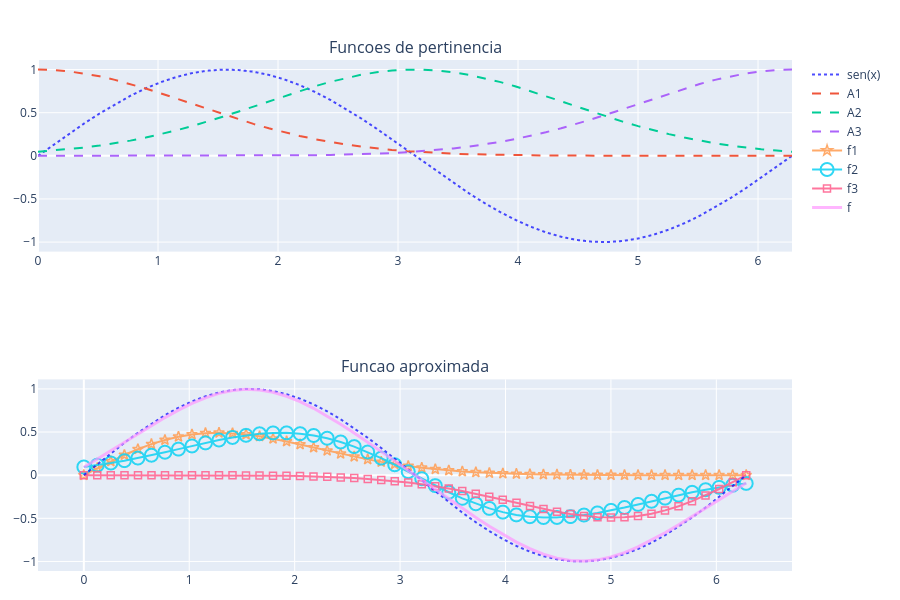

MSE: 0.0013601824421447587


In [273]:
def gaussmf(x, c, sigma):
    return np.exp(-0.5 * ((x - c) / sigma) ** 2)

x = np.linspace(0, 2*np.pi)
y = np.sin(x)
A1 = gaussmf(x, 0, 4/np.pi)
A2 = gaussmf(x, np.pi, 4/np.pi)
A3 = gaussmf(x, 2*np.pi, 4/np.pi)

f1 = y1 * A1
f2 = y2 * A2
f3 = y3 * A3
f = (f1 + f2 + f3) / (A1 + A2 + A3)

fig = make_subplots(rows=2, cols=1, 
                    subplot_titles=("Funcoes de pertinencia", 'Funcao aproximada'),
                    x_title='x')

fig.add_scatter(x=x,y=y, name='sen(x)', row=1, col=1, line_color='blue',opacity=0.7, line_dash='dot')
fig.add_scatter(x=x, y=A1, name='A1', line_dash= 'dash', row=1, col=1)
fig.add_scatter(x=x, y=A2, name='A2', line_dash= 'dash', row=1, col=1)
fig.add_scatter(x=x, y=A3, name='A3', line_dash= 'dash', row=1, col=1)

fig.add_scatter(x=x, y=f1, name='f1', row=2, col=1, line_width=2, mode='lines+markers', marker_symbol='star-open', marker_size=8, opacity=0.9, marker_line=dict(width=1.5))
fig.add_scatter(x=x, y=f2, name='f2', row=2, col=1, line_width=2, mode='lines+markers', marker_symbol='circle-open', marker_size=13, opacity=0.9, marker_line=dict(width=2))
fig.add_scatter(x=x, y=f3, name='f3', row=2, col=1, line_width=2, mode='lines+markers', marker_symbol='square-open', marker_size=7, opacity=0.9, marker_line=dict(width=1.5))

fig.add_scatter(x=x,y=y, name='sen(x)', row=2, col=1, showlegend=False, line_color='blue', opacity=0.7, line_dash='dot')
fig.add_scatter(x=x, y=f, name='f', row=2, col=1, opacity=0.7, line_width=3)
fig.update_layout(margin=dict(b=20,t=60,l=20))
fig.show(renderer='png', width=900, height=600)

mse = ((f - y).T @ (f - y)) / f.shape[0]
print(f'MSE: {mse}')

#### Experimento 3

Para a realização desse experimento, criou-se primeiramente uma função para gerar retas de aproximação espaçadas uniformemente entre si.

Criou-se funções que geram as aproximações triangulares e gaussianas automaticamente. Para a aproximação gaussiana, foi necessário adicionar um hiperparâmetro `sigma` que corresponde ao peso do $\sigma$ real das funções gaussianas, tornando-se $\sigma = \text{sigma}\cdot \frac{1}{\text{diff}}$, onde *diff* é a distância entre dois centros de gaussiana.

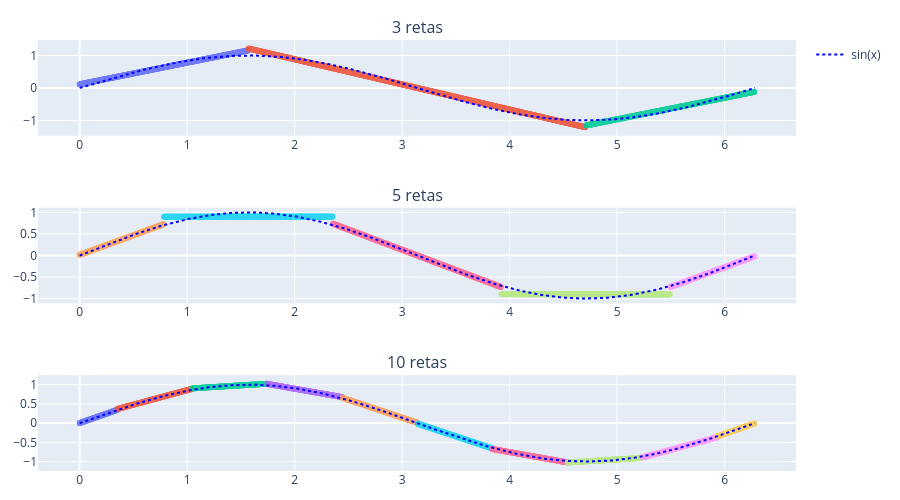

In [314]:
x = np.linspace(0, 2*np.pi, 1000)
y = np.sin(x)

def gen_aprox_lines(x, y, N, fig=None, row=None, col=None, showlegend=False):
    y_ = []
    points = np.linspace(0, 2*np.pi, N)
    diff = points[1] - points[0]
    for center in points:
        cidx = (np.abs(x - center + diff/2)).argmin() 
        idx = (np.abs(x - center - diff/2)).argmin()
        a, b = np.polyfit(x[cidx:idx], y[cidx:idx], 1)
        y_.append(a * x + b)
        if fig:
            fig.add_scatter(x=x[cidx:idx], y=a*x[cidx:idx]+b, opacity=0.9, 
                            row=row, col=col, showlegend=showlegend,
                            line_width=3, mode='lines+markers')
    return y_

fig = make_subplots(rows=3, cols=1, 
                    subplot_titles=("3 retas", '5 retas', '10 retas'),
                    x_title='x')
lines = gen_aprox_lines(x, y, 3, fig, row=1, col=1)
fig.add_scatter(x=x, y=y, line_dash='dot', row=1, col=1, line_color='blue', name='sin(x)')
lines = gen_aprox_lines(x, y, 5, fig, row=2, col=1)
fig.add_scatter(x=x, y=y, line_dash='dot', row=2, col=1, line_color='blue', showlegend=False)
lines = gen_aprox_lines(x, y, 10, fig, row=3, col=1)
fig.add_scatter(x=x, y=y, line_dash='dot', row=3, col=1, line_color='blue', showlegend=False)
fig.update_layout(margin=dict(b=20, l=20, t=40))

fig.show(renderer = 'png', width=900, height=500)

##### 5 Funções de pertinência triangulares

MSE: 0.003940807926468447


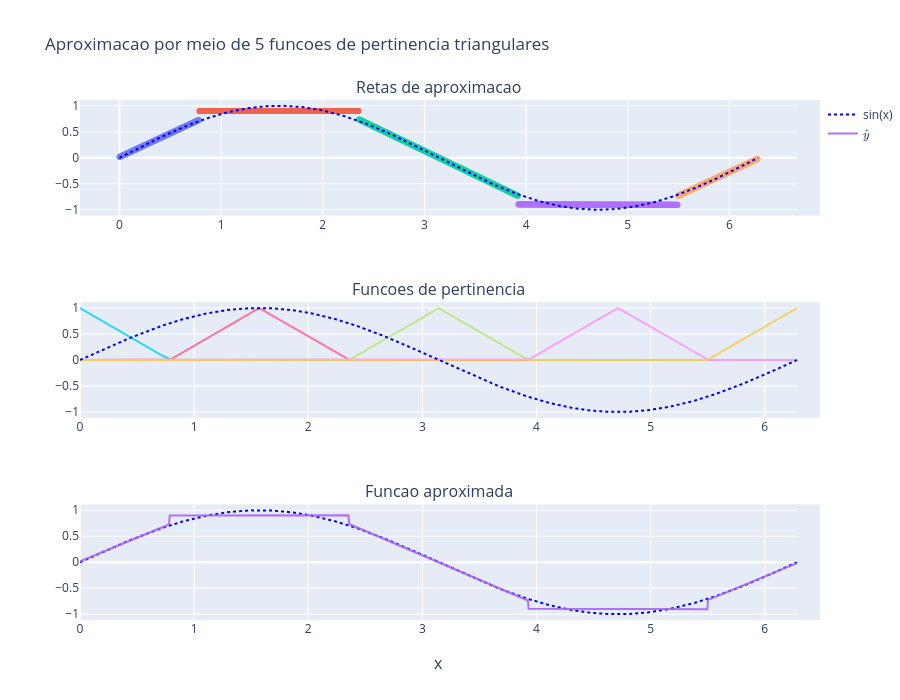

In [365]:
def gen_Ntrimf_aprox(x, y, N, fig=None, rows=[None, None], cols=[None, None], showlegend=False):
    lines = gen_aprox_lines(x, y, N, fig, row=rows[0], col=cols[0], showlegend=showlegend)
    y_ = []
    A_ = []
    points = np.linspace(0, 2*np.pi, N)
    diff = points[1] - points[0]
    for center, line in zip(points, lines):
        inf = center - diff/2
        sup = center + diff/2
        A = trimf(x, inf, center, sup)
        f_ = A * line
        A_.append(A)
        y_.append(f_)

        if fig:
            fig.add_scatter(x=x, y=A, opacity=0.9, 
                            row=rows[1], col=cols[1], showlegend=showlegend,
                            line_width=2)
    A_ = np.array(A_)
    y_ = np.array(y_)
    f = np.sum(y_, axis=0) / np.sum(A_, axis=0)

    return f, y_, A_

fig = make_subplots(rows=3, cols=1, 
                    subplot_titles=("Retas de aproximacao", 'Funcoes de pertinencia', 'Funcao aproximada'),
                    x_title='x')
y_hat, A, yn = gen_Ntrimf_aprox(x, y, 5, fig, rows=[1, 2], cols=[1, 1])
fig.add_scatter(x=x, y=y, line_dash='dot', line_color='blue', row=1, col=1, name='sin(x)')
fig.add_scatter(x=x, y=y, line_dash='dot', line_color='blue', row=2, col=1, showlegend=False)
fig.add_scatter(x=x, y=y, line_dash='dot', line_color='blue', row=3, col=1, showlegend=False)
fig.add_scatter(x=x, y=y_hat, row=3, col=1, opacity=0.9, name=r'$\widehat{y}$')
fig.update_layout(title='Aproximacao por meio de 5 funcoes de pertinencia triangulares')

mse = ((y_hat - y).T @ (y_hat - y)) / y_hat.shape[0]
print(f'MSE: {mse}')

fig.show(renderer='png', width=900, height=700)

##### 10 Funções de pertinência triangulares

MSE: 0.00016253068723956582


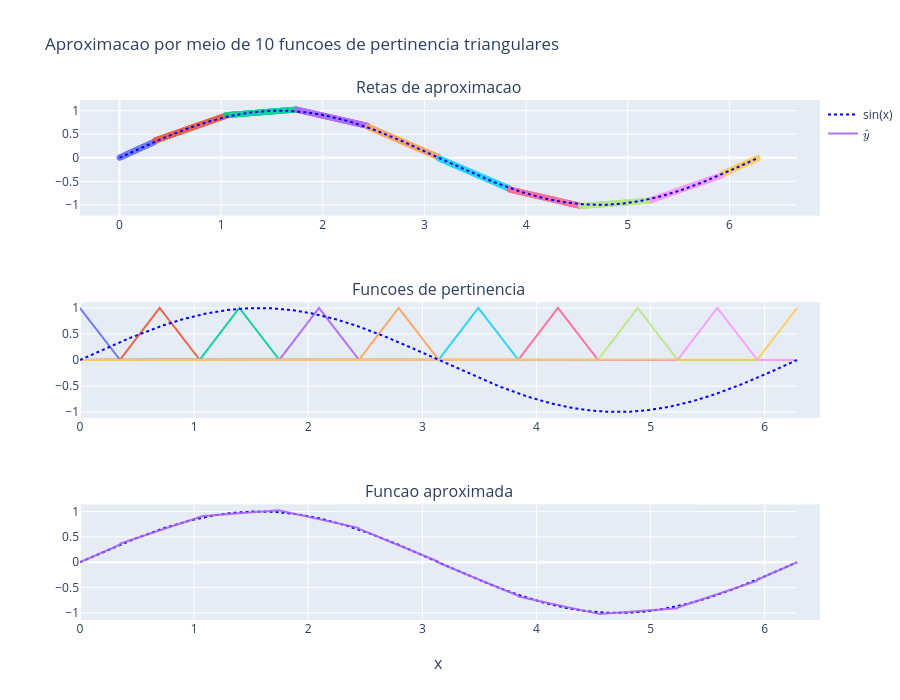

In [366]:
fig = make_subplots(rows=3, cols=1, 
                    subplot_titles=("Retas de aproximacao", 'Funcoes de pertinencia', 'Funcao aproximada'),
                    x_title='x')
y_hat, A, yn = gen_Ntrimf_aprox(x, y, 10, fig, rows=[1, 2], cols=[1, 1])
fig.add_scatter(x=x, y=y, line_dash='dot', line_color='blue', row=1, col=1, name='sin(x)')
fig.add_scatter(x=x, y=y, line_dash='dot', line_color='blue', row=2, col=1, showlegend=False)
fig.add_scatter(x=x, y=y, line_dash='dot', line_color='blue', row=3, col=1, showlegend=False)
fig.add_scatter(x=x, y=y_hat, row=3, col=1, opacity=0.9, name=r'$\widehat{y}$')
fig.update_layout(title='Aproximacao por meio de 10 funcoes de pertinencia triangulares')

mse = ((y_hat - y).T @ (y_hat - y)) / y_hat.shape[0]
print(f'MSE: {mse}')

fig.show(renderer='png', width=900, height=700)

##### 5 Funções de pertinência gaussianas

MSE: 0.00518884223910109


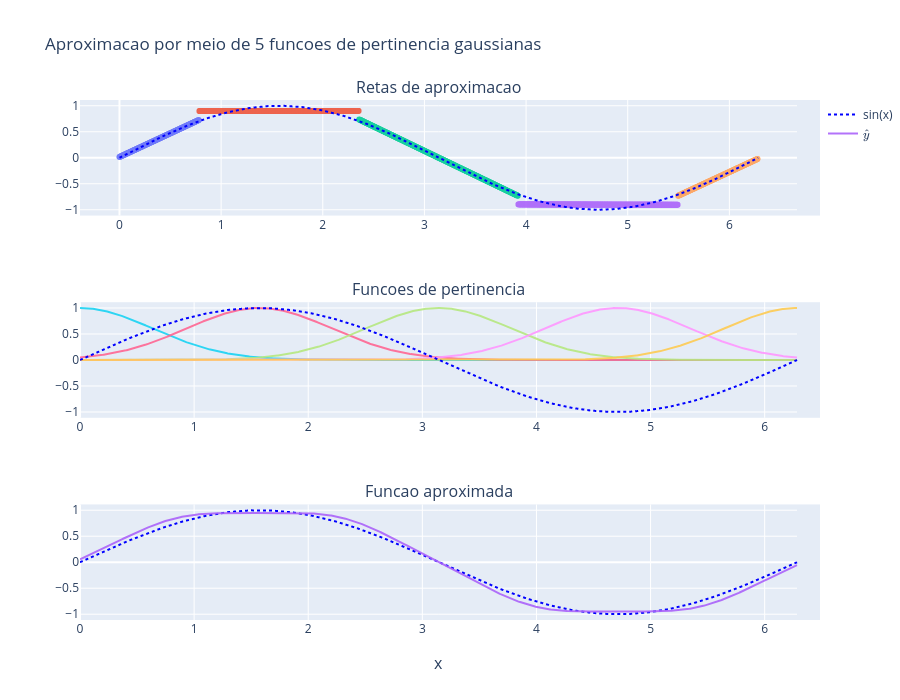

In [416]:
def gen_Ngauss_aprox(x, y, N, sigma, fig=None, rows=[None, None], cols=[None, None], showlegend=False):
    lines = gen_aprox_lines(x, y, N, fig, row=rows[0], col=cols[0], showlegend=showlegend)
    y_ = []
    A_ = []
    points = np.linspace(0, 2*np.pi, N)
    diff = points[1] - points[0]
    radius = sigma / diff

    for center, line in zip(points, lines):
        A = gaussmf(x, center, radius)
        f_ = A * line
        A_.append(A)
        y_.append(f_)

        if fig:
            fig.add_scatter(x=x, y=A, opacity=0.9, 
                            row=rows[1], col=cols[1], showlegend=showlegend,
                            line_width=2)
    A_ = np.array(A_)
    y_ = np.array(y_)
    f = np.sum(y_, axis=0) / np.sum(A_, axis=0)

    return f, y_, A_

fig = make_subplots(rows=3, cols=1, 
                    subplot_titles=("Retas de aproximacao", 'Funcoes de pertinencia', 'Funcao aproximada'),
                    x_title='x')
y_hat, A, yn = gen_Ngauss_aprox(x, y, 5, 1, fig, rows=[1, 2], cols=[1, 1])
fig.add_scatter(x=x, y=y, line_dash='dot', line_color='blue', row=1, col=1, name='sin(x)')
fig.add_scatter(x=x, y=y, line_dash='dot', line_color='blue', row=2, col=1, showlegend=False)
fig.add_scatter(x=x, y=y, line_dash='dot', line_color='blue', row=3, col=1, showlegend=False)
fig.add_scatter(x=x, y=y_hat, row=3, col=1, opacity=0.9, name=r'$\widehat{y}$')
fig.update_layout(title='Aproximacao por meio de 5 funcoes de pertinencia gaussianas')

mse = ((y_hat - y).T @ (y_hat - y)) / y_hat.shape[0]
print(f'MSE: {mse}')

fig.show(renderer='png', width=900, height=700)

##### 10 Funções de pertinência gaussianas

MSE: 0.0018669835452535665


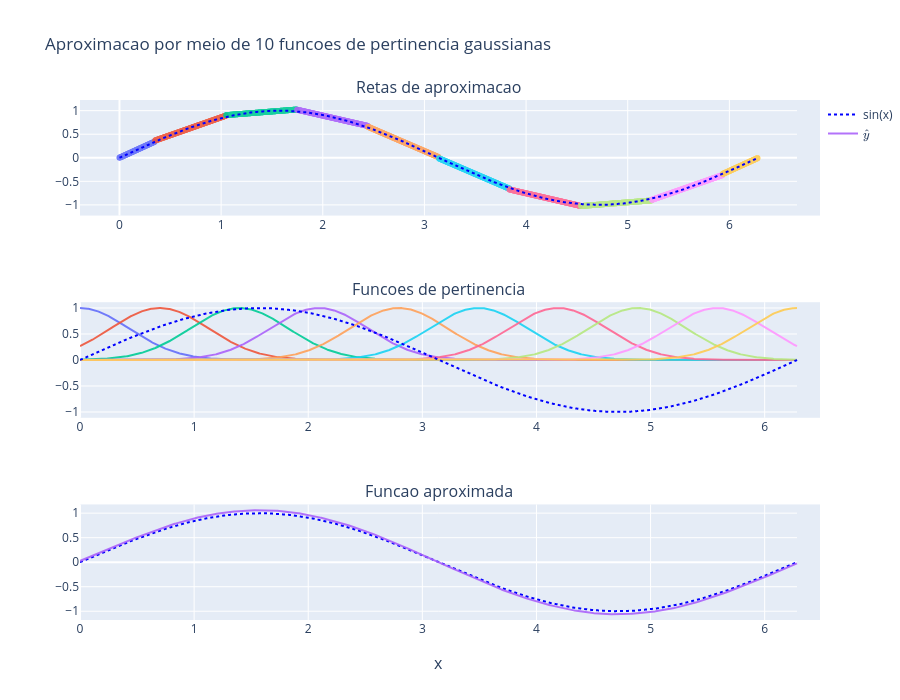

In [407]:
fig = make_subplots(rows=3, cols=1, 
                    subplot_titles=("Retas de aproximacao", 'Funcoes de pertinencia', 'Funcao aproximada'),
                    x_title='x')
y_hat, A, yn = gen_Ngauss_aprox(x, y, 10, 0.3, fig, rows=[1, 2], cols=[1, 1])
fig.add_scatter(x=x, y=y, line_dash='dot', line_color='blue', row=1, col=1, name='sin(x)')
fig.add_scatter(x=x, y=y, line_dash='dot', line_color='blue', row=2, col=1, showlegend=False)
fig.add_scatter(x=x, y=y, line_dash='dot', line_color='blue', row=3, col=1, showlegend=False)
fig.add_scatter(x=x, y=y_hat, row=3, col=1, opacity=0.9, name=r'$\widehat{y}$')
fig.update_layout(title='Aproximacao por meio de 10 funcoes de pertinencia gaussianas')

mse = ((y_hat - y).T @ (y_hat - y)) / y_hat.shape[0]
print(f'MSE: {mse}')

fig.show(renderer='png', width=900, height=700)

Nota-se então que, pela métrica do erro médio quadrático, que a aproximação triangular teve melhores resultados. Isso, entretanto não indica que a aproximação por funções de pertinência triangulares implica em melhores aproximações para funções senoidais, visto que há um hiperparâmetro na geração de aproximações gaussianas, para o qual não foi possível encontrar uma automação e, portanto, uma vez que não se fez um estudo de validação cruzada, não se pode garantir que os valores aplicados sejam os melhores.



| Função de pertinência | Número de regras | MSE |
| --- | ----------- |----------- |
| Triangular | 3 | 0.0013 |
| Triangular | 5 | 0.0039 |
| Triangular | 10 | 0.0002 |
| Gaussiana | 3 | 0.0014|
| Gaussiana | 5 | 0.0052 |
| Gaussiana | 10 | 0.00187|

### Questão 4

Definiu-se as funções de pertinência da qualidade do serviço como gaussianas e as funções da qualidade da comida como sigmoides.

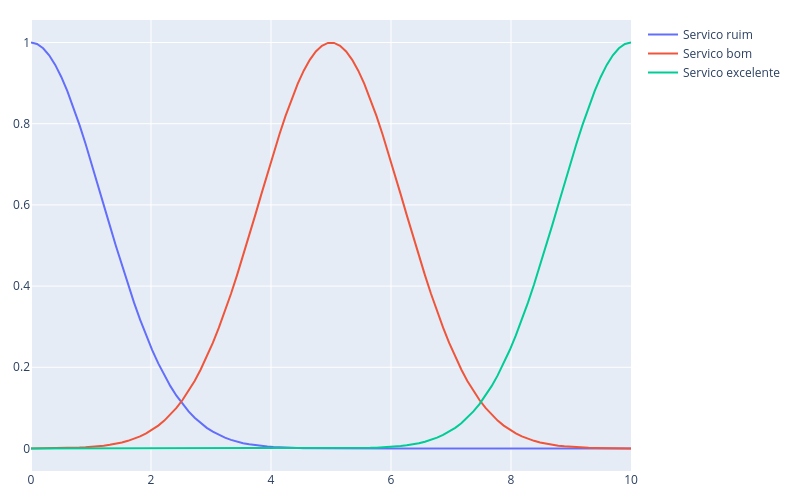

In [9]:
x = np.linspace(0, 10, 100)
bad_serv = gaussmf(x, 0, 1.2)
good_serv = gaussmf(x, 5, 1.2)
excel_serv = gaussmf(x, 10, 1.2)

fig = go.Figure(go.Scatter(x=x, y=bad_serv, name='Servico ruim'))
fig.add_scatter(x=x, y=good_serv, name='Servico bom')
fig.add_scatter(x=x, y=excel_serv, name='Servico excelente')
fig.update_layout(margin=dict(b=20,t=20,l=20))
fig.show(renderer='png', width=800, height=500)

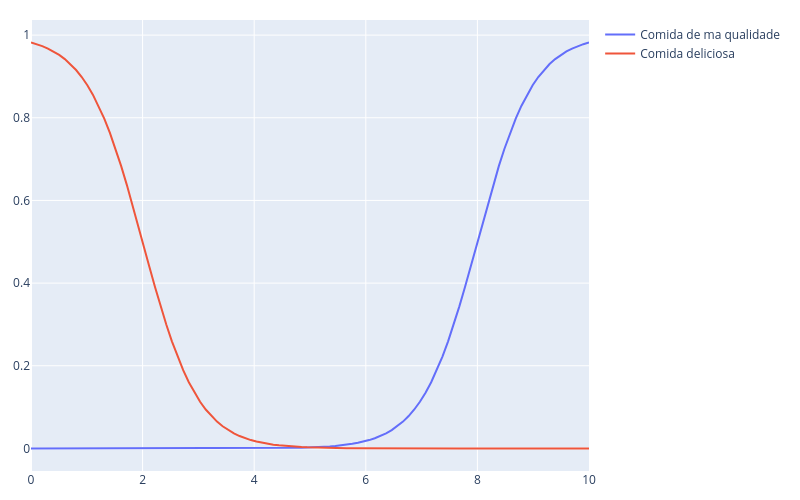

In [11]:
def sigmf(x, a, c):
    return 1 / (1 + np.exp(-a * (x - c)))

x = np.linspace(0, 10, 100)
bad_food = sigmf(x, 2, 8)
delic_food = sigmf(x, -2, 2)

fig = go.Figure(go.Scatter(x=x, y=bad_food, name='Comida de ma qualidade'))
fig.add_scatter(x=x, y=delic_food, name='Comida deliciosa')
fig.update_layout(margin=dict(b=20,t=20,l=20))
fig.show(renderer='png', width=800, height=500)

/tmp/ipykernel_31655/1396300624.py:19: RuntimeWarning:

invalid value encountered in true_divide



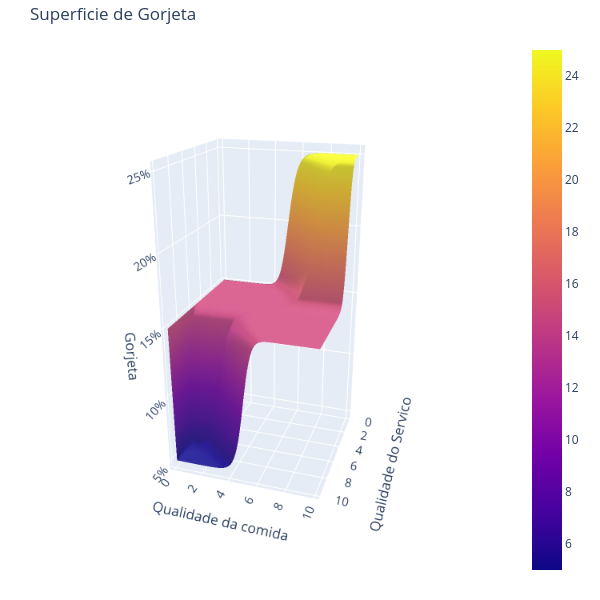

In [14]:
z = np.zeros((100, 100))
c = np.linspace(0, 10, 100)
s = np.linspace(0, 10, 100)

wc1 = np.maximum(np.minimum(c, bad_food), 0)
wc3 = np.maximum(np.minimum(c, delic_food), 0)

ws1 = np.maximum(np.minimum(s, bad_serv), 0)
ws2 = np.maximum(np.minimum(s, good_serv), 0)
ws3 = np.maximum(np.minimum(s, excel_serv), 0)

wc1_, ws1_ = np.meshgrid(wc1, ws1)
wc3_, ws3_ = np.meshgrid(wc3, ws3)

w1 = np.minimum(wc1_, ws1_)
w2, _ = np.meshgrid(ws2, ws2)
w3 = np.minimum(wc3_, ws3_)

z = (w1*5 + w2*15 + w3*25) / (w1+w2+w3)
np.nan_to_num(z, nan=0)
        
fig = go.Figure(go.Surface(x=s, y=c, z=z, opacity=0.9));
fig.update_layout(title='Superficie de Gorjeta', autosize=False,
                  width=600, height=600, margin=dict(l=20, r=50, b=20, t=40),
                  scene=dict(xaxis_title='Qualidade do Servico',
                  yaxis_title='Qualidade da comida',zaxis_title='Gorjeta',
                  camera=dict(up=dict(x=0,y=0,z=1), eye=dict(x=2.95, y=0.95, z=1.25),
                  center=dict(x=0, y=0, z=0)), zaxis = dict(ticksuffix='%'))
                  )
fig.show(renderer='png', width=600, height=600)

# Referências
[1]  Jyh-Shing Roger Jang and Chuen-Tsai Sun. 1996. *Neuro-Fuzzy and Soft 
Computing: A Computational Approach to Learning and Machine Intelligence*. 
Prentice-Hall, Inc., Upper Saddle River, NJ, USA.